In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

## Data

In [2]:
npz = np.load("FIFA19_data_train.npz")
train_inputs, train_targets = npz["inputs"].astype(np.float), npz["targets"].astype(np.float)

npz = np.load("FIFA19_data_validation.npz")
validation_inputs, validation_targets = npz["inputs"].astype(np.float), npz["targets"].astype(np.float)

npz = np.load("FIFA19_data_test.npz")
test_inputs, test_targets = npz["inputs"].astype(np.float), npz["targets"].astype(float)

## Model

In [3]:
input_size = 328
output_size = 1

hidden_layer_size = 200

model = tf.keras.Sequential([
    tf.keras.layers.Dense(hidden_layer_size, activation="tanh"),
    tf.keras.layers.Dense(hidden_layer_size, activation="tanh"),
    tf.keras.layers.Dense(hidden_layer_size, activation="tanh"),
    tf.keras.layers.Dense(hidden_layer_size, activation="tanh"),
    tf.keras.layers.Dense(output_size, activation="linear"),
])

model.compile(optimizer="adam", loss="mean_squared_error", metrics=["mean_absolute_error"])

batch_size = 100
max_epochs = 50

early_stopping = tf.keras.callbacks.EarlyStopping(patience=4)

hist = model.fit(train_inputs,
          train_targets,
          batch_size = batch_size,
          epochs = max_epochs,
          callbacks = [early_stopping],
          validation_data = (validation_inputs, validation_targets),
          verbose = 2
          )

Train on 14512 samples, validate on 1814 samples
Epoch 1/50
14512/14512 - 1s - loss: 2080.1541 - mean_absolute_error: 42.7182 - val_loss: 910.3802 - val_mean_absolute_error: 27.2099
Epoch 2/50
14512/14512 - 0s - loss: 548.1574 - mean_absolute_error: 18.3224 - val_loss: 392.5288 - val_mean_absolute_error: 11.8189
Epoch 3/50
14512/14512 - 0s - loss: 311.7750 - mean_absolute_error: 8.8127 - val_loss: 317.8550 - val_mean_absolute_error: 7.4332
Epoch 4/50
14512/14512 - 0s - loss: 261.8028 - mean_absolute_error: 6.7553 - val_loss: 311.5940 - val_mean_absolute_error: 6.8645
Epoch 5/50
14512/14512 - 0s - loss: 238.6169 - mean_absolute_error: 6.3569 - val_loss: 256.8454 - val_mean_absolute_error: 6.3921
Epoch 6/50
14512/14512 - 0s - loss: 208.7893 - mean_absolute_error: 6.1024 - val_loss: 214.0343 - val_mean_absolute_error: 6.6391
Epoch 7/50
14512/14512 - 0s - loss: 59.6176 - mean_absolute_error: 5.1329 - val_loss: 99.6111 - val_mean_absolute_error: 5.3189
Epoch 8/50
14512/14512 - 0s - loss: 43

Text(0, 0.5, 'Validation Loss')

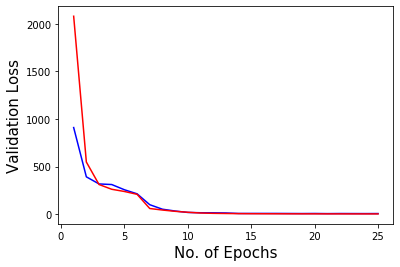

In [4]:
val_error = hist.history["val_loss"]
loss = hist.history["loss"]
epochs = range(1, len(val_error)+1)

plt.plot(epochs, val_error, color = "b")
plt.plot(epochs, loss, color = "r")
plt.xlabel("No. of Epochs", fontsize=15)
plt.ylabel("Validation Loss", fontsize=15)

## Evaluating the model

In [5]:
test_loss, test_accuracy = model.evaluate(test_inputs, test_targets)

1814/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [6]:
print ("Test Loss: {:.2f}, Expected Deviation for Prediction: {:.2f}".format(test_loss, test_accuracy))

Test Loss: 20.41, Expected Deviation for Prediction: 1.71
